<a href="https://colab.research.google.com/github/VivianeAndrade1988/biblioteca_pandas/blob/main/desafio_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np


In [134]:
marketing=pd.read_csv("/content/MKT.csv")
marketing.head()



,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [135]:
#RENOMEANDO NOMES DAS COLUNAS
marketing= marketing.rename(columns={"youtube":"Investimento_Youtube","facebook":"Investimento_Facebook","newspaper":"Investimento_Newspaper","sales":"Valor_das_vendas"})

In [136]:
marketing.head()

,Investimento_Youtube,Investimento_Facebook,Investimento_Newspaper,Valor_das_vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [137]:
marketing.describe()

,Investimento_Youtube,Investimento_Facebook,Investimento_Newspaper,Valor_das_vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [138]:
marketing.dtypes
#todos em formato float64, sem necessidade de correção.

Investimento_Youtube      float64
Investimento_Facebook     float64
Investimento_Newspaper    float64
Valor_das_vendas          float64
dtype: object

In [139]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investimento_Youtube    171 non-null    float64
 1   Investimento_Facebook   171 non-null    float64
 2   Investimento_Newspaper  171 non-null    float64
 3   Valor_das_vendas        171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [140]:
#identificando valores nulos
marketing.isnull().sum()
#não houve necessidade de correção.

Investimento_Youtube      0
Investimento_Facebook     0
Investimento_Newspaper    0
Valor_das_vendas          0
dtype: int64

In [141]:
#identificando valores duplicados (nenhum valor duplicado)
marketing.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Length: 171, dtype: bool

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [143]:
import pandas as pd
import seaborn as sns
import numpy as np

import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [170]:
marketing.describe()

,Investimento_Youtube,Investimento_Facebook,Investimento_Newspaper,Valor_das_vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Valores detalhados em gráficos (descrição)

In [144]:
fig = px.box(marketing, x="Investimento_Youtube")
fig.update_traces(line_color="blue")

In [145]:
fig = px.box(marketing, x="Investimento_Facebook")
fig.update_traces(line_color="blue")

In [146]:
fig = px.box(marketing, x="Investimento_Newspaper")
fig.update_traces(line_color="blue")

Regressão linear

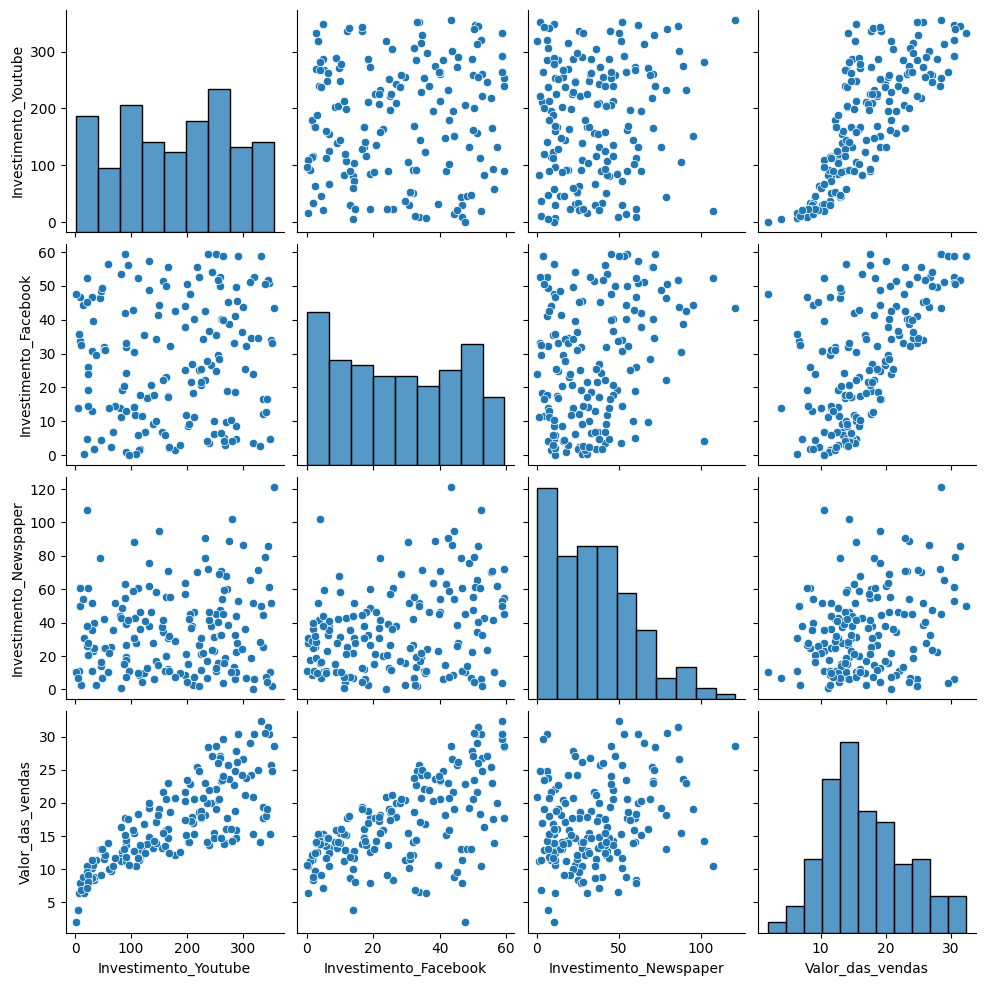

In [147]:
sns.pairplot(marketing)

In [148]:
marketing.columns

Index(['Investimento_Youtube', 'Investimento_Facebook',
       'Investimento_Newspaper', 'Valor_das_vendas'],
      dtype='object')

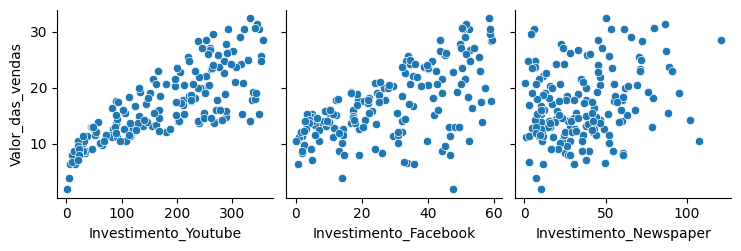

In [149]:
sns.pairplot(marketing, x_vars=['Investimento_Youtube', 'Investimento_Facebook', 'Investimento_Newspaper'],y_vars="Valor_das_vendas")

In [150]:
marketing.corr().reset_index()

,index,Investimento_Youtube,Investimento_Facebook,Investimento_Newspaper,Valor_das_vendas
0,Investimento_Youtube,1.000000,0.086538,0.110759,0.782030
1,Investimento_Facebook,0.086538,1.000000,0.293425,0.602918
2,Investimento_Newspaper,0.110759,0.293425,1.000000,0.254987
3,Valor_das_vendas,0.782030,0.602918,0.254987,1.000000


<Axes: >

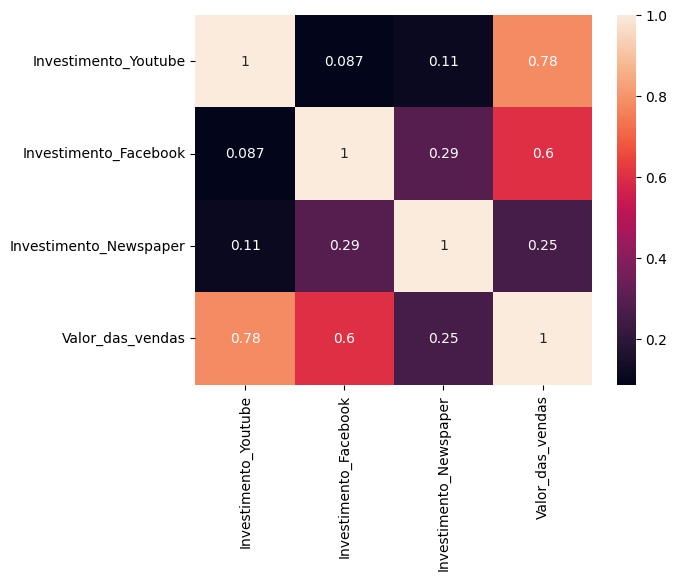

In [151]:
sns.heatmap(marketing.corr(),annot=True)

<Axes: xlabel='Valor_das_vendas', ylabel='Count'>

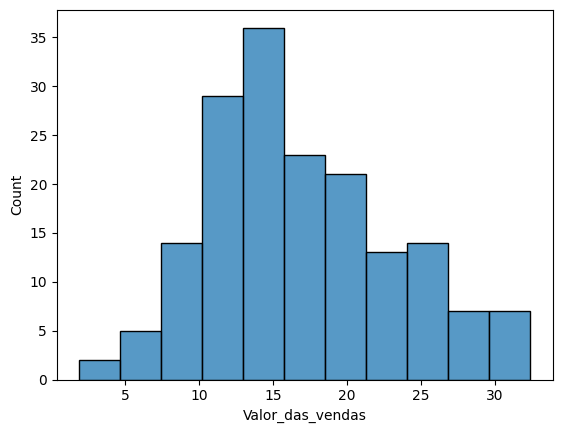

In [152]:
sns.histplot(marketing["Valor_das_vendas"])

<Axes: xlabel='Investimento_Youtube', ylabel='Count'>

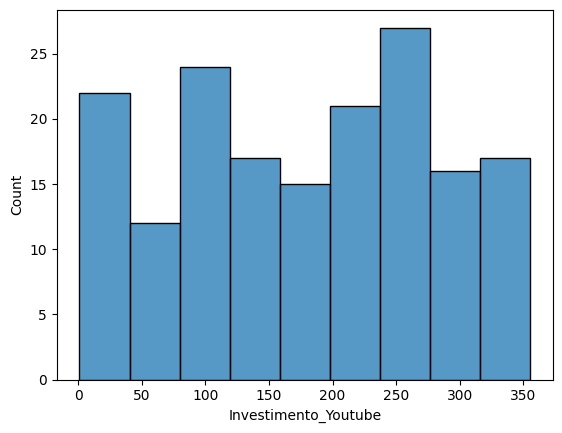

In [153]:
sns.histplot(marketing["Investimento_Youtube"])

<Axes: xlabel='Investimento_Facebook', ylabel='Count'>

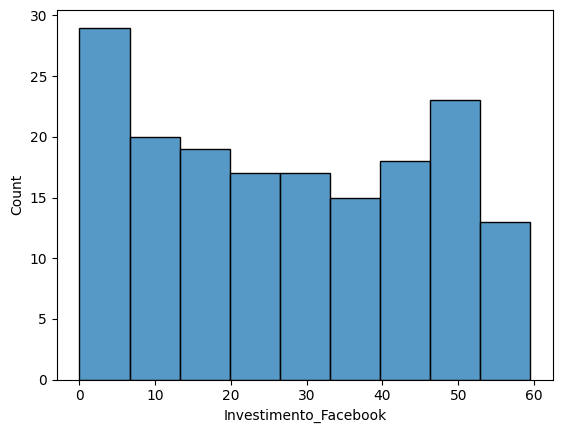

In [154]:
sns.histplot(marketing["Investimento_Facebook"])

<Axes: xlabel='Investimento_Newspaper', ylabel='Count'>

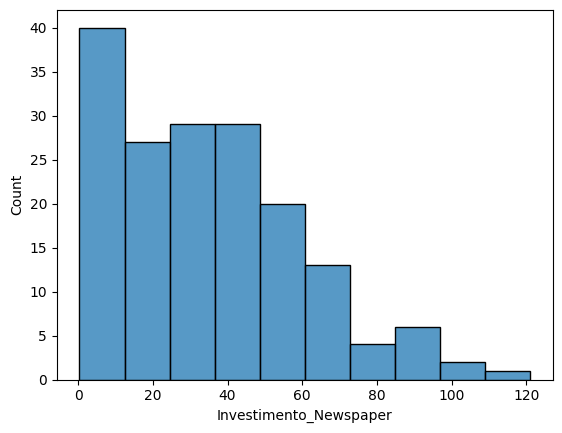

In [155]:
sns.histplot(marketing["Investimento_Newspaper"])

Treinando o modelo para predição

In [156]:
x= marketing[['Investimento_Youtube', 'Investimento_Facebook', 'Investimento_Newspaper']]
y= marketing [["Valor_das_vendas"]]

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, train_size= 0.7, test_size= 0.3,random_state=42)


In [159]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [160]:
from sklearn.linear_model import LinearRegression


In [161]:
lm=  LinearRegression()



In [162]:
lm.fit(X_train, Y_train)

LinearRegression()

In [163]:
y_pred= lm.predict (X_test)

In [164]:
from sklearn.metrics import r2_score
r =r2_score (Y_test, y_pred)

In [165]:
print("r_quadrado:",r)

r_quadrado: 0.882423505618885


In [166]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Vendas')

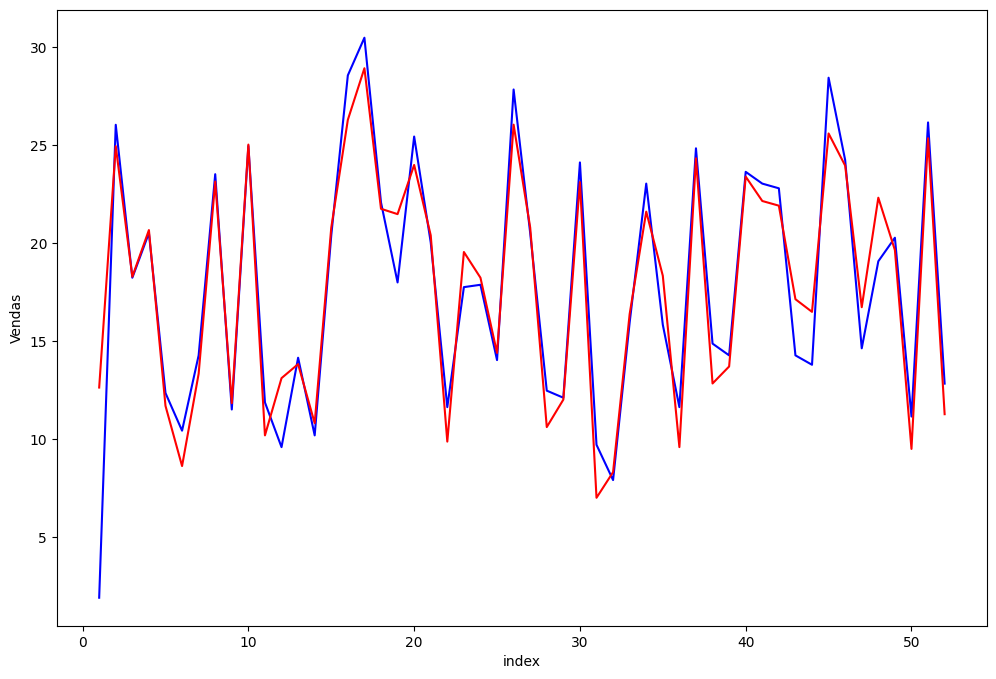

In [167]:
c= [i for i in range (1,53,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c,Y_test, color= "blue")
plt.plot(c, y_pred, color= "red")
plt.xlabel("index")
plt.ylabel("Vendas")


In [168]:
marketing.describe()

,Investimento_Youtube,Investimento_Facebook,Investimento_Newspaper,Valor_das_vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [169]:
Investimento_Youtube= 350
Investimento_Facebook= 60
Investimento_Newspaper= 115
entrada = [[Investimento_Youtube, Investimento_Facebook, Investimento_Newspaper]]
lm.predict(entrada)[0]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([30.76069254])